In [59]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (E:\Study\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
df = pd.read_csv('Xtrain.csv')
df_y = pd.read_csv('Ytrain.csv')
df = pd.concat([df, df_y['ChargeOff']], axis=1, sort=False)

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
Id                   50000 non-null int64
Name                 49999 non-null object
City                 50000 non-null object
State                50000 non-null object
Zip                  50000 non-null int64
Bank                 49924 non-null object
BankState            49923 non-null object
NAICS                50000 non-null int64
ApprovalDate         50000 non-null object
ApprovalFY           50000 non-null object
Term                 50000 non-null int64
NoEmp                50000 non-null int64
NewExist             49993 non-null float64
CreateJob            50000 non-null int64
RetainedJob          50000 non-null int64
FranchiseCode        50000 non-null int64
UrbanRural           50000 non-null int64
RevLineCr            49847 non-null object
LowDoc               49828 non-null object
DisbursementDate     49881 non-null object
DisbursementGross    50000 non-null obj

In [45]:
df = df.drop(['Name', 'City', 'Zip', 'BankState', 'Bank'], axis= 1)

In [46]:
print(df['State'].unique())

def get_state_code(state):
    #https://www.stateabbreviations.us/
    state_map = {'AK': 1, 'AL': 2, 'AR': 3, 'AZ': 4,'CA': 5, 'CO': 6, 'CT': 7, 'DC': 8,
                 'DE': 9, 'FL': 10, 'GA': 11, 'HI': 12, 'IA': 13, 'ID': 14, 'IL': 15, 'IN': 16, 
                 'KS': 17, 'KY': 18, 'LA': 19, 'MA': 20, 'MD': 21, 'ME': 22, 'MI': 23, 'MN': 24,
                 'MO': 25, 'MS': 26, 'MT': 27, 'NC': 28, 'ND': 29, 'NE': 30, 'NH': 31, 'NJ': 32,
                 'NM': 33, 'NV': 34, 'NY': 35, 'OH': 36, 'OK': 37, 'OR': 38, 'PA': 39, 'RI': 40,
                 'SC': 41, 'SD': 42, 'TN': 43, 'TX': 44, 'UT': 45, 'VA': 46, 'VT': 47, 'WA': 48,
                 'WI': 49, 'WV': 50, 'WY': 51}
    if state in state_map:
        return state_map[state]
    else:
        return 0

df['State'] = df['State'].apply(get_state_code)


['FL' 'UT' 'CA' 'WI' 'MO' 'CO' 'NV' 'MD' 'OH' 'TX' 'VA' 'KS' 'MA' 'IA'
 'GA' 'WA' 'IL' 'NE' 'ND' 'RI' 'AZ' 'MN' 'WY' 'NJ' 'OK' 'NY' 'CT' 'IN'
 'HI' 'ID' 'KY' 'PA' 'MI' 'AR' 'TN' 'NH' 'MT' 'OR' 'WV' 'MS' 'NC' 'SD'
 'AL' 'DE' 'DC' 'LA' 'AK' 'ME' 'VT' 'SC' 'NM']


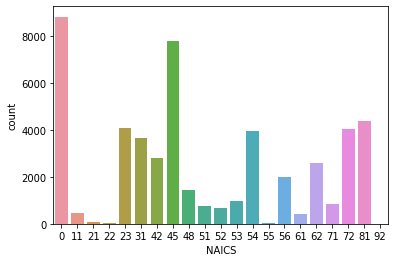

In [47]:
def get_industry_code(naics):
    #https://www.naics.com/search/
    if naics <= 0:
        return 0
    
    code =  naics // 10 ** (int(math.log(naics, 10)) - 1)
    if code >=31 and code <= 33:
        code = 31
    if code >= 44 and code <= 45:
        code = 45
    if code >= 48 and code <= 49:
        code = 48
    return code

df['NAICS'] = df['NAICS'].apply(get_industry_code)
sb.countplot(x='NAICS', data=df)
    

In [48]:
print(df['ApprovalFY'].unique())

df['ApprovalFY'] = df['ApprovalFY'].replace('1976A', 1976)
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

print(df['ApprovalFY'].unique())

['2010' '2002' '1994' '2006' '2008' '2000' '2007' '2005' '2001' '2011'
 '1996' '1984' '2004' '1989' '1999' '1998' '2003' '2009' '1997' '1992'
 '1990' '1993' '1985' '1983' '1991' '1995' '2012' '1986' '1987' '1982'
 '1988' '2013' '1981' '1978' '1979' '1980' '1977' '1973' '2014' '1976'
 '1974' '1975' '1971' '1972' '1970' '1969' '1976A']
[2010 2002 1994 2006 2008 2000 2007 2005 2001 2011 1996 1984 2004 1989
 1999 1998 2003 2009 1997 1992 1990 1993 1985 1983 1991 1995 2012 1986
 1987 1982 1988 2013 1981 1978 1979 1980 1977 1973 2014 1976 1974 1975
 1971 1972 1970 1969]


['N' 'Y' nan 'S' '0' 'C' 'A' 'R']


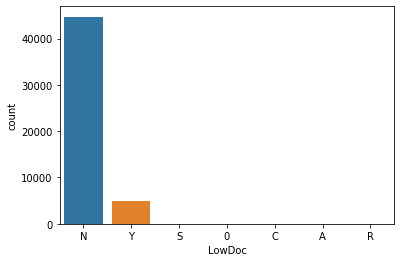

In [49]:
print(df['LowDoc'].unique())
sb.countplot(x='LowDoc', data=df)
sb.countplot(x='LowDoc', data=df)
df['LowDoc'] = df['LowDoc'].replace({'S': None, '0': None, 'C':None, 'A':None, 'R':None})
df['LowDoc'] = df['LowDoc'].replace({'N': 0, 'Y':1})

[ 1.  2.  0. nan]


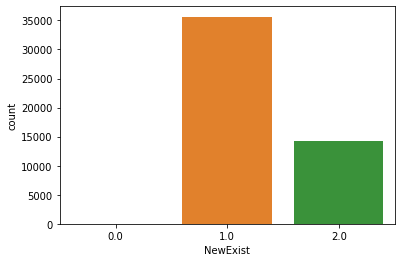

In [50]:
print(df['NewExist'].unique())
sb.countplot(x='NewExist', data=df)
df['NewExist'] = df['NewExist'].replace(0, None)

['N' 'Y' 'T' '0' nan]


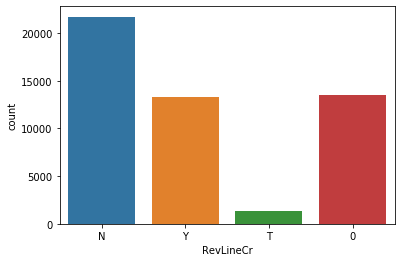

In [51]:
print(df['RevLineCr'].unique())
sb.countplot(x='RevLineCr', data=df)
df['RevLineCr'] = df['RevLineCr'].replace({'T': None, 'N': 0, 'Y':1, '0': 0})

[    0     1  9050 25035 66347 17900 36995 64609 77020 89352 22470 15100
 68020 78760 34650 10611 68150 67750   900 52000 32055 30811 87580  8023
 10494 67255 52875 64976 54100 17998 66910 89775 71685  6140 10676 79140
 70879 89785 68060 39700 79153 69146  1350 64950 67759 75000 74782 89639
 79950 50850 66694 10703 21425 29237 50564  1507 82285 16868 32130 10625
 21780 79220 20550  2105 68250 61400 37469 48020 65140 38510 17750 77174
  8659 44725 65925 19755 33150 71650 74770 34845 47400 77895 81965 84725
 89769 79902 62360  1560 58686 20546 35706 21420 66666 10484 66486 50954
 81630 65100 52070 71720 64211 65152 46750 65250 38605 25650 32418 53650
 17205 81612 38601 10605   407 43570 79350 65150 31154 75900 31360 48450
 14839 66615  7969 46425 28883 81621 47426 56575 21870 64900 64657 23000
 61901 17584 73525 70671 75410 66643 39598 24850 28960 55825 70554 29582
 10528 45150 33165 41850 39588 80025 26650 57601 58616 60590 51778 24706
 81606 66350 73675 11950 46410 49952 59225 69058 10

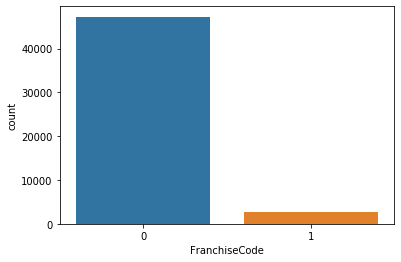

In [52]:
print(df['FranchiseCode'].unique())
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0 )
df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ), 1, 0)
sb.countplot(x='FranchiseCode', data=df)


In [53]:
money_cols = ['DisbursementGross', 'BalanceGross','GrAppv', 'SBA_Appv']
df[money_cols] = df[money_cols].replace('[\$,]', '', regex=True).astype(float) 

In [54]:
date_cols = ['ApprovalDate', 'DisbursementDate']
df[date_cols] = pd.to_datetime(df[date_cols].stack(), format='%d-%b-%y').unstack()
print(df[date_cols].head())

   Id  State  NAICS ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  \
0   0     10     31   2010-04-16        2010   130     25       1.0   
1   1     45     23   2010-01-30        2010    33      6       1.0   
2   2      5     81   2002-07-29        2002    60      1       1.0   
3   3     49      0   1994-06-10        1994   160      1       2.0   
4   4     25     62   2006-02-06        2006   101      2       1.0   

   CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc  \
0          2            0              0           1        0.0     0.0   
1          1            3              0           1        0.0     0.0   
2          1            1              0           1        1.0     0.0   
3          0            0              0           0        0.0     0.0   
4          7            2              0           1        NaN     0.0   

  DisbursementDate  DisbursementGross  BalanceGross     GrAppv   SBA_Appv  \
0       2010-05-01          2000000.0        

In [55]:
df = df.dropna()
df['LowDoc'] = df['LowDoc'].astype(int)
df['NewExist'] = df['NewExist'].astype(int)
df['RevLineCr'] = df['RevLineCr'].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48009 entries, 0 to 49999
Data columns (total 20 columns):
Id                   48009 non-null int64
State                48009 non-null int64
NAICS                48009 non-null int64
ApprovalDate         48009 non-null datetime64[ns]
ApprovalFY           48009 non-null int32
Term                 48009 non-null int64
NoEmp                48009 non-null int64
NewExist             48009 non-null int32
CreateJob            48009 non-null int64
RetainedJob          48009 non-null int64
FranchiseCode        48009 non-null int32
UrbanRural           48009 non-null int64
RevLineCr            48009 non-null int32
LowDoc               48009 non-null int32
DisbursementDate     48009 non-null datetime64[ns]
DisbursementGross    48009 non-null float64
BalanceGross         48009 non-null float64
GrAppv               48009 non-null float64
SBA_Appv             48009 non-null float64
ChargeOff            48009 non-null int64
dtypes: datetime64[ns](2)

E:\Study\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Study\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Study\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

       RevLineCr  Term    GrAppv  State  NAICS  DisbursementGross  \
24819          0   180  495500.0     38      0           495500.0   
24210          0   154  144000.0      3      0           137331.0   
46685          1    19  100000.0     15     62           256857.0   
32443          0   180   75000.0     51     45            75000.0   
14164          1    16   50000.0      4     42           187910.0   

       RetainedJob  CreateJob  
24819            0          0  
24210            0          0  
46685            0          0  
32443            0          0  
14164            3          5  


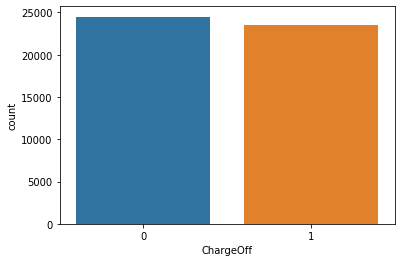

In [58]:
sb.countplot(x='ChargeOff', data=df)

df_train = df[['RevLineCr', 'Term', 'GrAppv', 'State', 'NAICS', 'DisbursementGross', 'RetainedJob', 'CreateJob']]
y = df['ChargeOff']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state = 2020, stratify = y)


